In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as KMeans

# KMeans

In [25]:
df=pd.read_csv('USArrests.csv')

In [26]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [27]:
df.index=df.iloc[:,0]

In [28]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [29]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [30]:
df=df.iloc[:,1:5]

In [31]:
del df.index.name

AttributeError: can't delete attribute

In [32]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


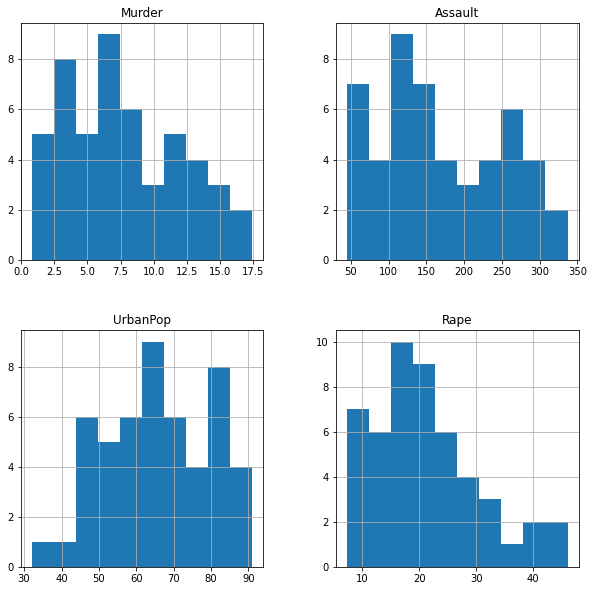

In [38]:
df.hist(figsize=(10,10));

In [42]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4)

In [45]:
model

KMeans(n_clusters=4)

In [47]:
k_fit=model.fit(df)

In [48]:
k_fit.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2])

In [49]:
k_fit.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

## Visualizing

In [51]:
kmeans=KMeans(n_clusters=2)

In [52]:
k_fit=kmeans.fit(df)

In [53]:
labels=k_fit.labels_
centers=k_fit.cluster_centers_

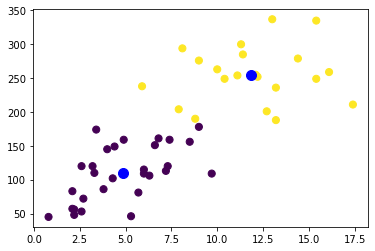

In [61]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=labels,s=50,cmap="viridis")
plt.scatter(centers[:,0],centers[:,1],c="blue",s=100,cmap="viridis")

In [64]:
from mpl_toolkits.mplot3d import Axes3D

In [68]:
kmeans=KMeans(n_clusters=3)
k_fit=kmeans.fit(df)
clusters=k_fit.labels_
centers=kmeans.cluster_centers_

C:\Users\Beytullah\AppData\Local\Temp\ipykernel_13612\2800925523.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


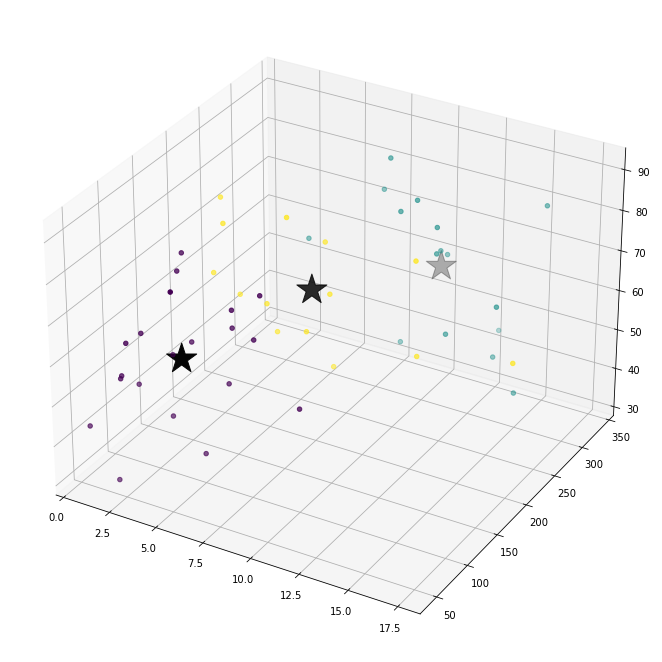

In [76]:
plt.rcParams['figure.figsize']=(16,9)
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=clusters);
ax.scatter(centers[:,0],centers[:,1],centers[:,2],marker='*',c="#050505",s=1000)

Eğer daha fazla boyut için görselleştirme yapmak istiyorsak PCA bileşen analizi yapabilriiz.

In [77]:
df["cluster_no"]=clusters

In [80]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1
